# Part I: Importing Libraries and Data

In [223]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Enable inline plotting
%matplotlib inline
plt.style.use('ggplot')

In [224]:
pull_req_data = pd.read_csv('./preprocessed_data_v2.csv')

In [225]:
pull_req_data.head(n=10)

,slug,gh_team_size,commits,git_num_commits,gh_num_issue_comments,general_comments,num_commit_comments,pull_req_comments,gh_num_pr_comments,additions,...,title_len,desc_len,gh_description_complexity,git_num_committers,Id,state,merged,merge_commit_sha,delta_mins_merge,delta_mins_close
0,aodn/aodn-portal,4,1,1,0,0,0,0,0,1,...,53,0,84,1,70072,closed,True,c3f6c953580397f684d76ab1952607c509d964b6,2.4500,2.4500
1,aodn/aodn-portal,5,1,1,0,0,0,0,0,2,...,58,128,6,1,70071,closed,True,077ab02e5ca9dac5d3929320c689b31ae611af4f,75.7167,75.7167
2,aodn/aodn-portal,5,1,1,0,1,0,0,0,11472,...,14,0,38,1,59144,open,False,de03e9827db84d1cf9ca9196021f6f1fbf85fe4a,-1.0000,-1.0000
3,aodn/aodn-portal,5,1,1,0,4,0,3,0,22,...,38,0,49,1,70062,closed,True,2f8a40a7c821ebafb1bd9ab865ea00a6a4ab19e5,21.8000,21.8000
4,aodn/aodn-portal,5,2,1,0,2,0,1,0,5,...,62,0,29,1,59143,open,False,fd1115de4c2e32f9e46c1dc6edc011d0c83628fa,-1.0000,-1.0000
5,aodn/aodn-portal,6,2,1,0,2,0,1,0,5,...,62,0,36,1,59143,open,False,fd1115de4c2e32f9e46c1dc6edc011d0c83628fa,-1.0000,-1.0000
6,aodn/aodn-portal,7,1,1,0,0,0,0,0,2,...,66,17,33,1,37783,closed,True,6aedc7cf7ad3f00c0aca86ec61c356c21d8e2fe1,210.1000,210.1000
7,aodn/aodn-portal,7,1,1,0,0,0,0,0,7,...,68,17,69,1,37782,closed,True,369166a58afb4fcfc7ddab09be3f71d8718b5f89,152.9670,152.9670
8,aodn/aodn-portal,7,1,1,0,0,0,0,0,7,...,72,0,46,1,37781,closed,True,b1898c536f5b8d20f6108e37960f1e9f4864fc80,1250.7300,1250.7300
9,aodn/aodn-portal,7,1,1,0,1,0,0,0,108,...,72,0,108,1,37786,closed,True,4d6242f108ed7d4717b3090c13795091c95ef9e7,1199.3300,1199.3300


In [226]:
pull_req_data.shape

(36665, 39)

# Part II: Basic Statistics

In [227]:
pull_req_data.describe()

,gh_team_size,commits,git_num_commits,gh_num_issue_comments,general_comments,num_commit_comments,pull_req_comments,gh_num_pr_comments,additions,deletions,...,gh_asserts_cases_per_kloc,gh_by_core_team_member,title_len,desc_len,gh_description_complexity,git_num_committers,Id,merged,delta_mins_merge,delta_mins_close
count,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,...,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,36665.000000,36665,36665.000000,36665.000000
mean,25.193809,6.010719,1.717878,0.724942,3.349707,0.636902,1.281931,0.658257,349.076667,196.921969,...,287.454096,0.889513,41.747552,283.269685,44.388081,1.166562,42128.905223,0.698732,376.940854,491.254493
std,18.413552,48.522909,2.986312,1.929189,6.354062,3.607060,6.136695,5.808104,2142.849869,1926.777871,...,1474.071870,0.313500,18.472355,626.956832,140.761117,0.398071,22268.978586,0.458815,473.098729,487.162215
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,False,-1.000000,-1.000000
25%,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,...,41.916948,1.000000,27.000000,15.000000,9.000000,1.000000,31198.000000,0,-1.000000,40.800000
50%,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,20.000000,4.000000,...,144.552106,1.000000,40.000000,101.000000,21.000000,1.000000,38912.000000,1,109.617000,302.367000
75%,39.000000,2.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,94.000000,22.000000,...,228.416016,1.000000,54.000000,292.000000,46.000000,1.000000,59254.000000,1,747.167000,938.117000
max,89.000000,1887.000000,151.000000,39.000000,136.000000,167.000000,327.000000,661.000000,116015.000000,43469.000000,...,135000.000000,1.000000,180.000000,12687.000000,7476.000000,6.000000,81785.000000,True,1439.200000,1439.200000


In [228]:
total_pull_req = len(pull_req_data)
pull_reqs_accepted = len(pull_req_data[pull_req_data["merged"] == True])
print 'Total pull requests in our given data = ', total_pull_req
print 'Accepted pull requests = ', pull_reqs_accepted
print 'Percentage of Accepted pull requests = %.2f' % ((float(pull_reqs_accepted)/float(total_pull_req)) * 100)
#perc_accepted = len(pulllen(pull_req_data[pull_req_data["merged"] == True])

Total pull requests in our given data =  36665
Accepted pull requests =  25619
Percentage of Accepted pull requests = 69.87


# Preprocessing (Split Target Feature and Columns)

In [229]:
def convertToNonNegatives(x):
    return round(x, -1)

In [230]:
pull_req_data['delta_mins_merge'] = pull_req_data['delta_mins_merge'].apply(convertToNonNegatives)
pull_req_data['delta_mins_close'] = pull_req_data['delta_mins_close'].apply(convertToNonNegatives)

In [231]:
pull_req_data['delta_mins_merge'].describe()

count    36665.000000
mean       377.207964
std        472.810602
min          0.000000
25%         -0.000000
50%        110.000000
75%        750.000000
max       1440.000000
Name: delta_mins_merge, dtype: float64

In [232]:
# This will be our target variable
Y = np.array(pull_req_data['merged'].apply(int))
Y
#dropped_features = pull_req_data.drop(['Id', 'state', 'merged', 'merge_commit_sha'], axis=1)
#dropped_features

array([1, 1, 0, ..., 1, 1, 1])

In [233]:
# Drop these features because they are redundant / we dont need to feed them in the ML model
# Note here:- We are removing delta_mins_merge and delta_mins_close because from the user's perspective
# They are not controllable
dropped_features = pull_req_data.drop(['delta_mins_merge', 'delta_mins_close', 'slug', 'Id', 'state', 'merged', 'merge_commit_sha'], axis=1)
X = dropped_features.as_matrix().astype(np.float)
X.shape

(36665, 32)

In [236]:
features = dropped_features.columns
pprint.pprint(features)

Index([u'gh_team_size', u'commits', u'git_num_commits',
       u'gh_num_issue_comments', u'general_comments', u'num_commit_comments',
       u'pull_req_comments', u'gh_num_pr_comments', u'additions', u'deletions',
       u'churn', u'changed_files', u'gh_src_churn', u'gh_test_churn',
       u'gh_files_added', u'gh_files_deleted', u'gh_files_modified',
       u'gh_tests_added', u'gh_tests_deleted', u'gh_src_files',
       u'gh_doc_files', u'gh_other_files', u'gh_commits_on_files_touched',
       u'gh_sloc', u'gh_test_lines_per_kloc', u'gh_test_cases_per_kloc',
       u'gh_asserts_cases_per_kloc', u'gh_by_core_team_member', u'title_len',
       u'desc_len', u'gh_description_complexity', u'git_num_committers'],
      dtype='object')


# Merge time statistics

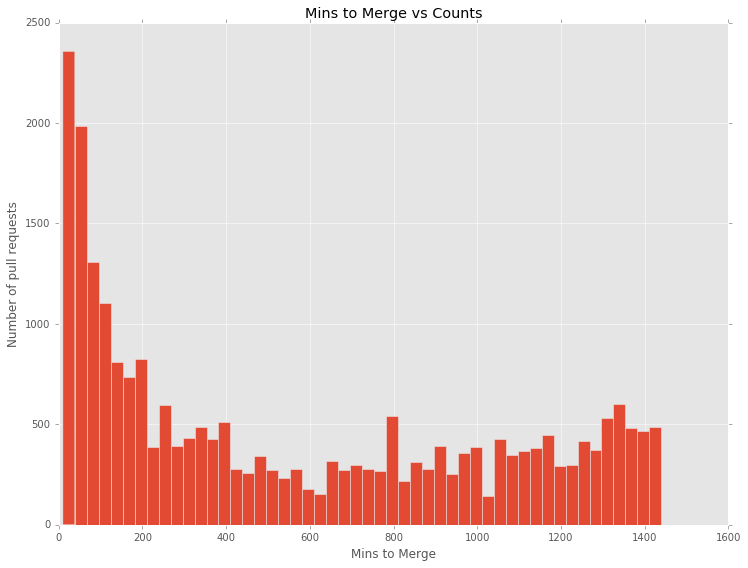

In [184]:
plt.rcParams["figure.figsize"] = [12, 9]
data_to_graph = (pull_req_data[pull_req_data['delta_mins_merge'] != 0])['delta_mins_merge']
plt.hist(data_to_graph, bins=50)
plt.title("Mins to Merge vs Counts")
plt.xlabel("Mins to Merge")
plt.ylabel("Number of pull requests")
plt.show()

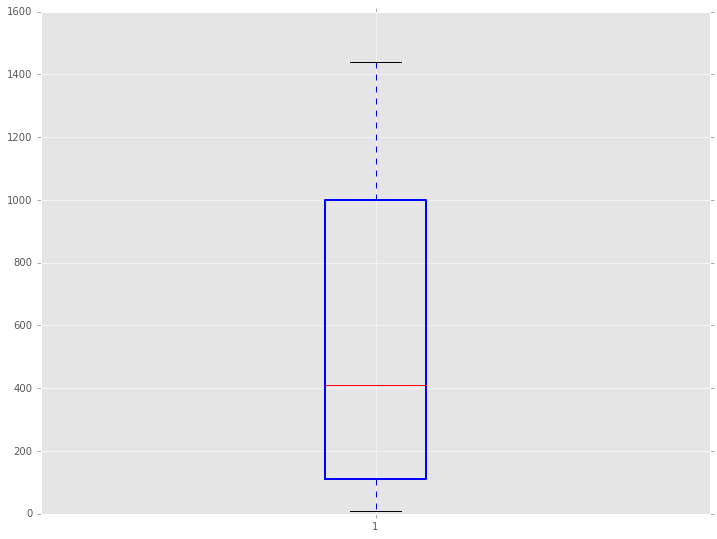

In [185]:
#data_to_graph
bp = plt.boxplot(np.array(data_to_graph))
#bp['boxes'].set( color='#7570b3', linewidth=2)
#bp['boxes'].set( facecolor = '#1b9e77' )
#bp.show()
#bp['boxes']
plt.setp(bp['boxes'], color='Blue', linewidth=2)
plt.show()

In [186]:
data_to_graph.describe()

count    24583.000000
mean       562.597323
std        478.665167
min         10.000000
25%        110.000000
50%        410.000000
75%       1000.000000
max       1440.000000
Name: delta_mins_merge, dtype: float64

# Part III: Feature Selection

In [237]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score, ShuffleSplit
import pprint

# Trees Ensemble Feature Selection

In [248]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, Y)
importances = forest.feature_importances_
print importances
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

scores = []
names = dropped_features.columns
# Print the feature ranking
#print 'Names = ', names
#print("Feature ranking:")

for f in range(X.shape[1]):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    scores.append((importances[indices[f]], names[indices[f]]))

pprint.pprint(sorted(scores, reverse=True))
# Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
# plt.show()

[ 0.03065142  0.06423291  0.01135296  0.01435962  0.09400317  0.01203855
  0.03713021  0.01023443  0.07326251  0.06507026  0.06805259  0.06154327
  0.01800692  0.01487095  0.0112941   0.00644924  0.01712558  0.00107935
  0.00417652  0.01728483  0.01217379  0.01278266  0.02245864  0.02845181
  0.02406806  0.02376812  0.02387079  0.00397033  0.08405716  0.09345062
  0.03068401  0.00804463]
[(0.094003172320783715, 'general_comments'),
 (0.093450618199561561, 'desc_len'),
 (0.084057156445772288, 'title_len'),
 (0.073262510029779293, 'additions'),
 (0.068052593189160474, 'churn'),
 (0.065070262724836084, 'deletions'),
 (0.064232911534850487, 'commits'),
 (0.06154327093377901, 'changed_files'),
 (0.037130206666877101, 'pull_req_comments'),
 (0.030684007044996898, 'gh_description_complexity'),
 (0.030651419791924085, 'gh_team_size'),
 (0.028451814398717665, 'gh_sloc'),
 (0.024068055630787843, 'gh_test_lines_per_kloc'),
 (0.023870793998529916, 'gh_asserts_cases_per_kloc'),
 (0.0237681158877823

In [245]:
rand_for = RandomForestRegressor(n_estimators=50, max_depth=4)
scores = []
names = dropped_features.columns
for i in range(X.shape[1]):
    score = cross_val_score(rand_for, X[:, i:i+1], Y, scoring="r2",
                              cv=ShuffleSplit(len(X), 3, .3))
    scores.append((round(np.mean(score), 3), names[i]))
pprint.pprint(sorted(scores, reverse=True))

[(0.065, 'general_comments'),
 (0.053, 'desc_len'),
 (0.045, 'commits'),
 (0.042, 'additions'),
 (0.037, 'churn'),
 (0.022, 'title_len'),
 (0.02, 'changed_files'),
 (0.017, 'deletions'),
 (0.007, 'gh_test_lines_per_kloc'),
 (0.006, 'gh_sloc'),
 (0.006, 'gh_asserts_cases_per_kloc'),
 (0.005, 'pull_req_comments'),
 (0.005, 'gh_test_cases_per_kloc'),
 (0.005, 'gh_description_complexity'),
 (0.003, 'gh_team_size'),
 (0.0, 'num_commit_comments'),
 (-0.0, 'git_num_committers'),
 (-0.0, 'git_num_commits'),
 (-0.0, 'gh_src_churn'),
 (-0.0, 'gh_other_files'),
 (-0.0, 'gh_num_issue_comments'),
 (0.0, 'gh_files_modified'),
 (-0.0, 'gh_files_deleted'),
 (-0.0, 'gh_files_added'),
 (-0.0, 'gh_doc_files'),
 (-0.0, 'gh_commits_on_files_touched'),
 (0.0, 'gh_by_core_team_member'),
 (-0.001, 'gh_tests_deleted'),
 (-0.001, 'gh_tests_added'),
 (-0.001, 'gh_test_churn'),
 (-0.001, 'gh_src_files'),
 (-0.001, 'gh_num_pr_comments')]


# Univariate Feature Selection

In [246]:
ch2 = SelectKBest(chi2,"all")
X_train = ch2.fit_transform(X, Y)
top_ranked_features = sorted(enumerate(ch2.scores_),key=lambda x:x[1], reverse=True)[:32]
for index,(position,score) in enumerate(top_ranked_features):
    print '%d) %s - %f' % (index+1, names[position], score)
#top_ranked_features

1) churn - 9721908.650009
2) additions - 6989824.738701
3) gh_sloc - 4975088.599997
4) deletions - 2795072.252169
5) desc_len - 581175.353609
6) changed_files - 301806.253978
7) commits - 160693.487392
8) gh_test_lines_per_kloc - 12021.406493
9) general_comments - 10708.764344
10) gh_description_complexity - 7064.366159
11) gh_src_churn - 1426.750542
12) gh_test_churn - 1074.534246
13) gh_commits_on_files_touched - 722.034010
14) title_len - 592.278876
15) gh_doc_files - 551.847572
16) gh_test_cases_per_kloc - 406.256094
17) pull_req_comments - 368.630404
18) gh_files_modified - 197.755180
19) gh_tests_deleted - 94.946529
20) gh_asserts_cases_per_kloc - 47.297462
21) gh_num_pr_comments - 36.206189
22) git_num_commits - 27.271028
23) gh_team_size - 26.378798
24) gh_tests_added - 14.348207
25) gh_src_files - 11.359242
26) gh_files_added - 4.970554
27) gh_other_files - 4.896403
28) num_commit_comments - 3.664546
29) gh_files_deleted - 3.513385
30) gh_by_core_team_member - 0.851033
31) gh_

## Recursive Feature Elimination

In [247]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
top_n_features = 10
# create the RFE model and select top 10 attributes
rfe = RFE(model, top_n_features)
rfe = rfe.fit(X, Y)
# summarize the selection of the attributes
#print(rfe.support_)
#print(rfe.ranking_)

scores = []
for feature_name,rank in zip(names, rfe.ranking_):
    scores.append((feature_name, rank))

pprint.pprint(sorted(scores, key=lambda x:x[1]))


[('commits', 1),
 ('git_num_commits', 1),
 ('gh_num_issue_comments', 1),
 ('general_comments', 1),
 ('pull_req_comments', 1),
 ('gh_tests_added', 1),
 ('gh_doc_files', 1),
 ('gh_by_core_team_member', 1),
 ('title_len', 1),
 ('git_num_committers', 1),
 ('num_commit_comments', 2),
 ('gh_files_modified', 3),
 ('gh_src_files', 4),
 ('gh_files_deleted', 5),
 ('gh_team_size', 6),
 ('gh_num_pr_comments', 7),
 ('changed_files', 8),
 ('gh_description_complexity', 9),
 ('gh_other_files', 10),
 ('gh_test_cases_per_kloc', 11),
 ('gh_asserts_cases_per_kloc', 12),
 ('gh_files_added', 13),
 ('gh_tests_deleted', 14),
 ('deletions', 15),
 ('desc_len', 16),
 ('additions', 17),
 ('gh_test_lines_per_kloc', 18),
 ('churn', 19),
 ('gh_test_churn', 20),
 ('gh_src_churn', 21),
 ('gh_commits_on_files_touched', 22),
 ('gh_sloc', 23)]


# Part IV: Modelling Phase

In [294]:
# Take only the representative features using previous phase
features = [
'general_comments',
'desc_len',
'commits',
'additions',
'churn',
'title_len',
'changed_files',
'deletions',
'gh_test_lines_per_kloc']
'gh_sloc']
# 'gh_asserts_cases_per_kloc',
# 'pull_req_comments',
# 'gh_test_cases_per_kloc',
# 'gh_description_complexity',
# 'gh_team_size']
X_new = dropped_features[features].as_matrix().astype(np.float)
X_new.shape


SyntaxError: invalid syntax (<ipython-input-294-598727808e83>, line 12)

In [295]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.20, random_state = 7)
print X_train.shape
print y_train.shape

print X_test.shape
print y_test.shape

(29332, 9)
(29332,)
(7333, 9)
(7333,)


In [296]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.learning_curve import validation_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [297]:
# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.59      0.09      0.15      2195
          1       0.71      0.97      0.82      5138

avg / total       0.68      0.71      0.62      7333

[[ 190 2005]
 [ 130 5008]]


0.70885040229101326

In [312]:
# fit a logistic regression model to the data
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       0.62      0.54      0.58      2195
          1       0.81      0.86      0.84      5138

avg / total       0.76      0.76      0.76      7333

[[1189 1006]
 [ 723 4415]]


0.76421655529796806

In [320]:
# fit a logistic regression model to the data
model = DecisionTreeClassifier(max_depth=40,criterion="entropy")
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2195
          1       0.99      0.99      0.99      5138

avg / total       0.98      0.98      0.98      7333

[[2138   57]
 [  75 5063]]


0.98199918178098999

In [300]:
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(X_train, y_train)

# make predictions
expected = Y
predicted = clf_random_forest.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

             precision    recall  f1-score   support

          0       0.98      0.97      0.98      2195
          1       0.99      0.99      0.99      5138

avg / total       0.99      0.99      0.99      7333

[[2139   56]
 [  50 5088]]


0.98554479749079504

In [301]:
clf_random_forest = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             algorithm="SAMME",
                             n_estimators=600)
clf_random_forest.fit(X_train, y_train)

# make predictions
expected = Y
predicted = clf_random_forest.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

             precision    recall  f1-score   support

          0       0.59      0.20      0.30      2195
          1       0.73      0.94      0.82      5138

avg / total       0.69      0.72      0.67      7333

[[ 435 1760]
 [ 302 4836]]


0.71880540024546569

In [321]:
from sklearn import svm

In [322]:
# fit a logistic regression model to the data
model = svm.SVC()
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       0.99      0.32      0.48      2195
          1       0.77      1.00      0.87      5138

avg / total       0.84      0.80      0.76      7333

[[ 703 1492]
 [   4 5134]]


0.79599072685122052